# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_excel(r"merkur.xlsx")
df

,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Værket ved Regnemark,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,...,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,Værket ved Søndersø,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,...,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,Østerbyværket,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,...,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,Østre Vandværk - Herning,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,...,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

Summary of the Process:

1.    Filter Irrelevant Columns, Remove NaNs
2.    Impute Missing Values
3.    Remove or Replace Outliers
4.    Transform Numeric Data
5.    Scale Numeric Data
6.    One-Hot Encode Categorical Variables
7.    Create a Correlation Matrix

### Step 1. Filtering out missing and unnecessary data

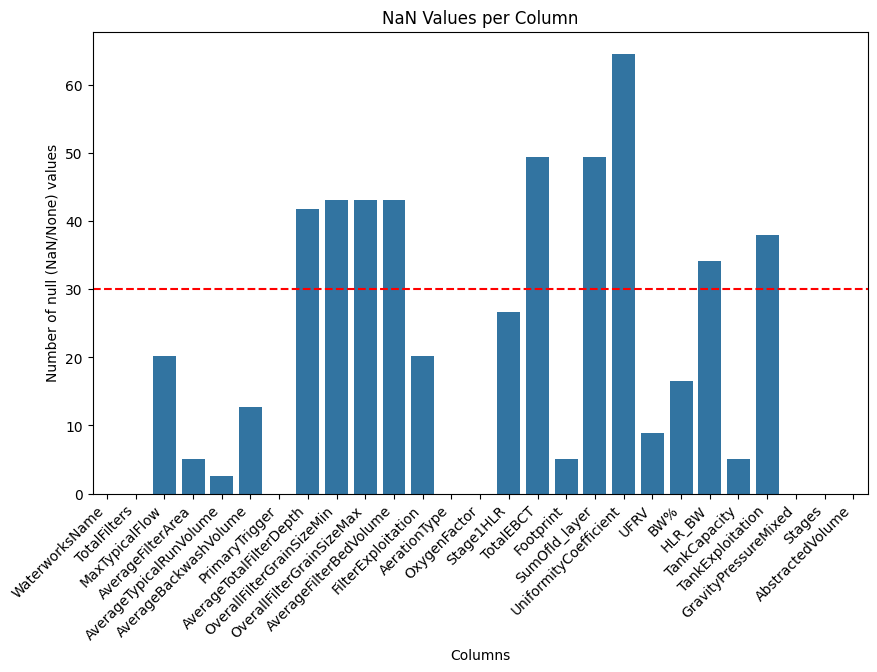

In [102]:
nan_percent = (df.isnull().sum() / len(df)) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=nan_percent.index, y=nan_percent.values)
plt.xticks(rotation=45, ha='right')
plt.axhline(y=30, color='red', linestyle='--', label='30% Threshold')
plt.xlabel('Columns')
plt.ylabel('Number of null (NaN/None) values')
plt.title('NaN Values per Column')
plt.show()


In [103]:
import pandas as pd

df = pd.read_excel('merkur.xlsx')

missing_percentage = df.isnull().mean() * 100
#missing percentage x >=30% of missing values
df_filtered = df.loc[:, missing_percentage < 30]
data_frame_copy = df_filtered

print("Comparison of rows x cols after removing rows with missing values")
print("Original rows x cols:", df.shape)
print("Filtered rows x cols:", df_filtered.shape)

#NaN percentage, threshold 60% of values has to be present
threshold = int(0.6 * data_frame_copy.shape[1])
data_frame_point2 = data_frame_copy.dropna(thresh=threshold)
print("After droping NaNs", data_frame_point2.shape)
data_frame_point2

Comparison of rows x cols after removing rows with missing values
Original rows x cols: (79, 27)
Filtered rows x cols: (79, 18)
After droping NaNs (79, 18)


,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,FilterExploitation,AerationType,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,TankCapacity,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00,6.000000,5200.00000,10.00,Time,57.886530,Cascade,1.880000,1.388889,143.341204,866.666667,0.414525,27.294778,Gravity,Single,253543
1,Assens Vandværk,4,110.00,4.908739,300.00000,28.00,Volume,63.521586,Air injection,1.620000,11.204508,16.714412,40.743665,23.000062,2.576075,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00,15.343900,3800.00000,83.30,Volume,64.908486,Bottom aeration,2.213333,3.935020,44.693822,249.217919,2.192086,21.825600,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,Cascade,2.073333,NaN,194.588021,75.000000,2.166907,12.554300,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.00000,4.50,Volume,NaN,Cascade,1.313333,NaN,412.300024,167.224093,1.818182,52.220566,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Værket ved Regnemark,16,1426.00,47.940002,NaN,110.00,Mix,91.698648,Cascade,1.546667,5.242647,24.106636,NaN,0.178441,9.176959,Gravity,Double,11454775
75,Værket ved Søndersø,20,1407.29,10.178760,4500.00000,57.00,Volume,89.405620,Passive plate aerator,2.133333,6.912876,22.050800,442.097088,1.236822,6.040393,Pressure,Single,11021800
76,Østerbyværket,6,250.00,14.752500,2331.50137,51.57,Time,19.331598,Bottom aeration,1.673333,2.824380,209.076387,158.041107,4.446077,22.367525,Gravity,Single,423362
77,Østre Vandværk - Herning,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,Cascade,2.200000,NaN,152.513970,93.489396,35.386015,NaN,Gravity,Double,1521895


In [104]:
data_frame_point2 = data_frame_point2.drop(columns=['WaterworksName'])
data_frame_point2

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,FilterExploitation,AerationType,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,TankCapacity,GravityPressureMixed,Stages,AbstractedVolume
0,6,50.00,6.000000,5200.00000,10.00,Time,57.886530,Cascade,1.880000,1.388889,143.341204,866.666667,0.414525,27.294778,Gravity,Single,253543
1,4,110.00,4.908739,300.00000,28.00,Volume,63.521586,Air injection,1.620000,11.204508,16.714412,40.743665,23.000062,2.576075,Pressure,Double,612094
2,4,120.00,15.343900,3800.00000,83.30,Volume,64.908486,Bottom aeration,2.213333,3.935020,44.693822,249.217919,2.192086,21.825600,Gravity,Double,682318
3,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,Cascade,2.073333,NaN,194.588021,75.000000,2.166907,12.554300,Gravity,Single,156998
4,2,NaN,1.495000,250.00000,4.50,Volume,NaN,Cascade,1.313333,NaN,412.300024,167.224093,1.818182,52.220566,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,1426.00,47.940002,NaN,110.00,Mix,91.698648,Cascade,1.546667,5.242647,24.106636,NaN,0.178441,9.176959,Gravity,Double,11454775
75,20,1407.29,10.178760,4500.00000,57.00,Volume,89.405620,Passive plate aerator,2.133333,6.912876,22.050800,442.097088,1.236822,6.040393,Pressure,Single,11021800
76,6,250.00,14.752500,2331.50137,51.57,Time,19.331598,Bottom aeration,1.673333,2.824380,209.076387,158.041107,4.446077,22.367525,Gravity,Single,423362
77,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,Cascade,2.200000,NaN,152.513970,93.489396,35.386015,NaN,Gravity,Double,1521895


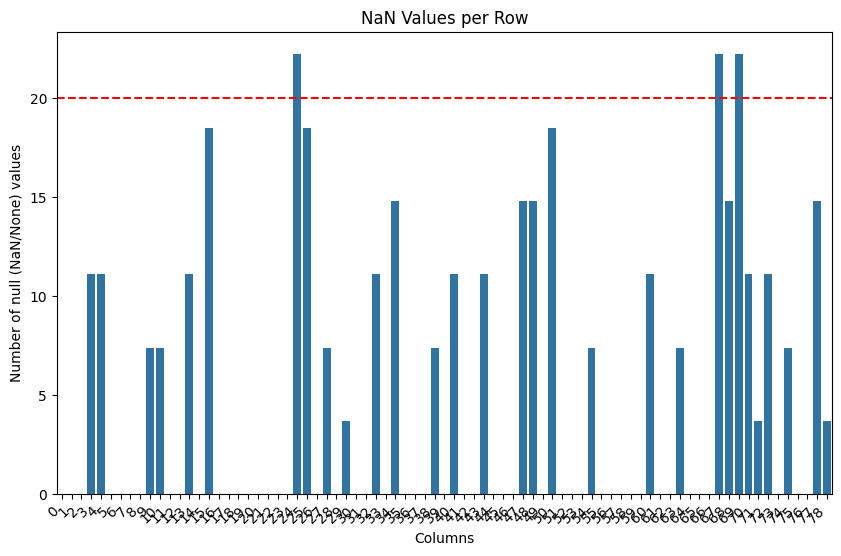

In [105]:
nan_percent = (data_frame_point2.isnull().sum(axis=1) / df.shape[1]) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=nan_percent.index, y=nan_percent.values)
plt.xticks(rotation=45, ha='right')
plt.axhline(y=20, color='red', linestyle='--', label='20% Threshold')
plt.xlabel('Columns')
plt.ylabel('Number of null (NaN/None) values')
plt.title('NaN Values per Row')
plt.show()


### 2. Imputing Nans

In [106]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

num_cols = data_frame_point2.select_dtypes(include=['number']).columns
data_frame_imputed = pd.DataFrame(imputer.fit_transform(data_frame_point2[num_cols]), columns=num_cols)

### 3. Removing/replacing outliers

C:\Users\Test\AppData\Local\Temp\ipykernel_6996\3615083149.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(outliers_pd['col_name'], rotation=90)
C:\Users\Test\AppData\Local\Temp\ipykernel_6996\3615083149.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(df_outliers.loc[:, ~df_outliers.columns.str.contains('_')].columns, rotation=90)


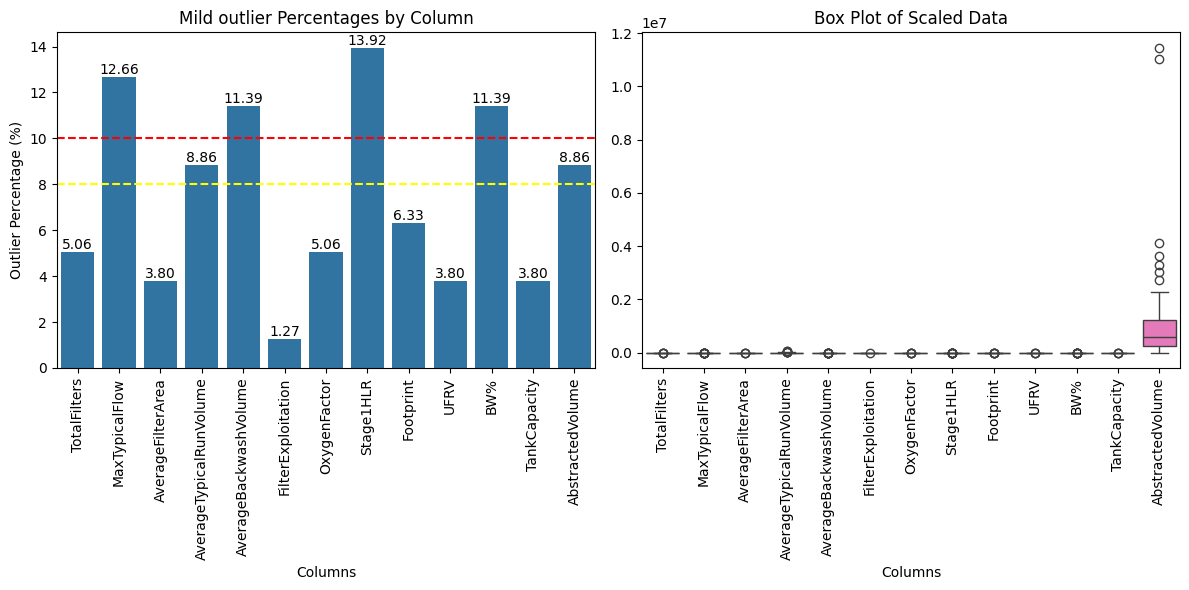

In [107]:
def outlier_stat(df_outliers):
    outliers_perc = {}

    for column in df_outliers.loc[:, ~df_outliers.columns.str.contains('_')].columns:
        Q1 = df_outliers[column].quantile(0.25)
        Q3 = df_outliers[column].quantile(0.75)
        IQR = Q3 - Q1 
        threshold = 1.5

        outliers = df_outliers[(df_outliers[column] < Q1 - threshold * IQR) | (df_outliers[column] > Q3 + threshold * IQR)]
        if len(df_outliers[column]) > 0:
            outliers_perc[column] = (len(outliers) * 100) / len(df_outliers[column]) 

    outliers_pd = pd.DataFrame({"col_name":outliers_perc.keys(), "out_perc":outliers_perc.values()})

    #display(outliers_perc)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # First subplot: Bar plot for outlier percentages
    sns.barplot(x=outliers_pd['col_name'], y=outliers_pd['out_perc'], ax=axs[0])
    axs[0].set_title('Mild outlier Percentages by Column')
    axs[0].set_xlabel('Columns')
    axs[0].set_ylabel('Outlier Percentage (%)')
    axs[0].set_xticklabels(outliers_pd['col_name'], rotation=90)
    axs[0].axhline(y=10, color='red', linestyle='--', label='10% Threshold')
    axs[0].axhline(y=8, color='yellow', linestyle='--', label='8% Threshold')
    for bar in axs[0].containers:
        axs[0].bar_label(bar, fmt='%.2f', label_type='edge')


    # Second subplot: Box plot for scaled data
    sns.boxplot(data=df_outliers.loc[:, ~df_outliers.columns.str.contains('_')], ax=axs[1])
    axs[1].set_title('Box Plot of Scaled Data')
    axs[1].set_xlabel('Columns')
    axs[1].set_xticklabels(df_outliers.loc[:, ~df_outliers.columns.str.contains('_')].columns, rotation=90)


    plt.tight_layout()
    plt.show()

outlier_stat(data_frame_imputed.select_dtypes(exclude=['object']))

C:\Users\Test\AppData\Local\Temp\ipykernel_6996\326797164.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(outliers_pd['col_name'], rotation=90)
C:\Users\Test\AppData\Local\Temp\ipykernel_6996\326797164.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(df_outliers.loc[:, ~df_outliers.columns.str.contains('_')].columns, rotation=90)


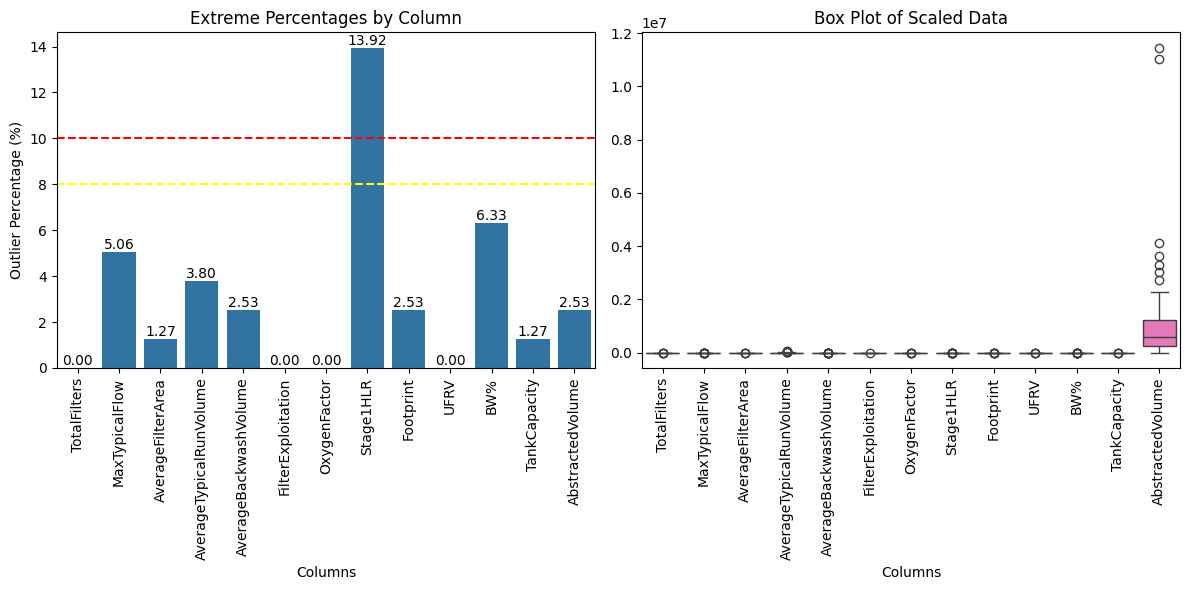

In [108]:
def ext_outlier_stat(df_outliers):
    outliers_perc = {}

    for column in df_outliers.loc[:, ~df_outliers.columns.str.contains('_')].columns:
        Q1 = df_outliers[column].quantile(0.25)
        Q3 = df_outliers[column].quantile(0.75)
        IQR = Q3 - Q1 
        threshold = 3

        outliers = df_outliers[(df_outliers[column] < Q1 - threshold * IQR) | (df_outliers[column] > Q3 + threshold * IQR)]
        if len(df_outliers[column]) > 0:
            outliers_perc[column] = (len(outliers) * 100) / len(df_outliers[column]) 

    outliers_pd = pd.DataFrame({"col_name":outliers_perc.keys(), "out_perc":outliers_perc.values()})

    #display(outliers_perc)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # First subplot: Bar plot for outlier percentages
    sns.barplot(x=outliers_pd['col_name'], y=outliers_pd['out_perc'], ax=axs[0])
    axs[0].set_title('Extreme Percentages by Column')
    axs[0].set_xlabel('Columns')
    axs[0].set_ylabel('Outlier Percentage (%)')
    axs[0].set_xticklabels(outliers_pd['col_name'], rotation=90)
    axs[0].axhline(y=10, color='red', linestyle='--', label='10% Threshold')
    axs[0].axhline(y=8, color='yellow', linestyle='--', label='8% Threshold')
    for bar in axs[0].containers:
        axs[0].bar_label(bar, fmt='%.2f', label_type='edge')


    # Second subplot: Box plot for scaled data
    sns.boxplot(data=df_outliers.loc[:, ~df_outliers.columns.str.contains('_')], ax=axs[1])
    axs[1].set_title('Box Plot of Scaled Data')
    axs[1].set_xlabel('Columns')
    axs[1].set_xticklabels(df_outliers.loc[:, ~df_outliers.columns.str.contains('_')].columns, rotation=90)


    plt.tight_layout()
    plt.show()

ext_outlier_stat(data_frame_imputed.select_dtypes(exclude=['object']))

array([[<Axes: title={'center': 'TotalFilters'}>,
        <Axes: title={'center': 'MaxTypicalFlow'}>,
        <Axes: title={'center': 'AverageFilterArea'}>,
        <Axes: title={'center': 'AverageTypicalRunVolume'}>],
       [<Axes: title={'center': 'AverageBackwashVolume'}>,
        <Axes: title={'center': 'FilterExploitation'}>,
        <Axes: title={'center': 'OxygenFactor'}>,
        <Axes: title={'center': 'Stage1HLR'}>],
       [<Axes: title={'center': 'Footprint'}>,
        <Axes: title={'center': 'UFRV'}>,
        <Axes: title={'center': 'BW%'}>,
        <Axes: title={'center': 'TankCapacity'}>],
       [<Axes: title={'center': 'AbstractedVolume'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

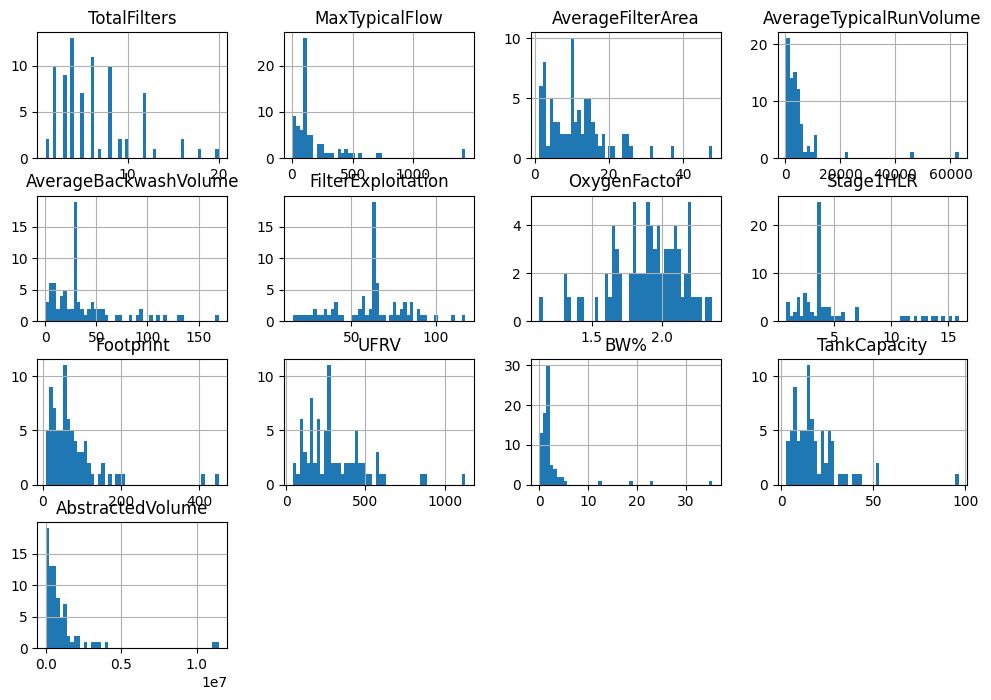

In [109]:
data_frame_imputed.hist(bins=50, figsize=(12,8))

C:\Users\Test\AppData\Local\Temp\ipykernel_6996\3615083149.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(outliers_pd['col_name'], rotation=90)
C:\Users\Test\AppData\Local\Temp\ipykernel_6996\3615083149.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(df_outliers.loc[:, ~df_outliers.columns.str.contains('_')].columns, rotation=90)


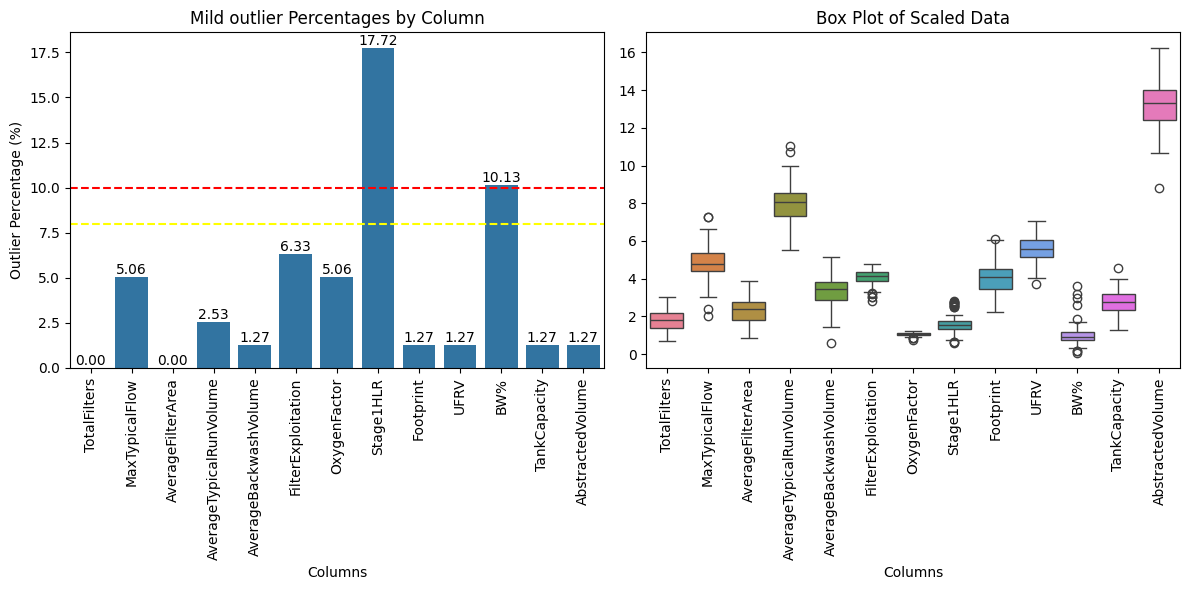

In [110]:
data_frame_outliers = np.log1p(data_frame_imputed)
outlier_stat(data_frame_outliers)

C:\Users\Test\AppData\Local\Temp\ipykernel_6996\3615083149.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(outliers_pd['col_name'], rotation=90)
C:\Users\Test\AppData\Local\Temp\ipykernel_6996\3615083149.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(df_outliers.loc[:, ~df_outliers.columns.str.contains('_')].columns, rotation=90)


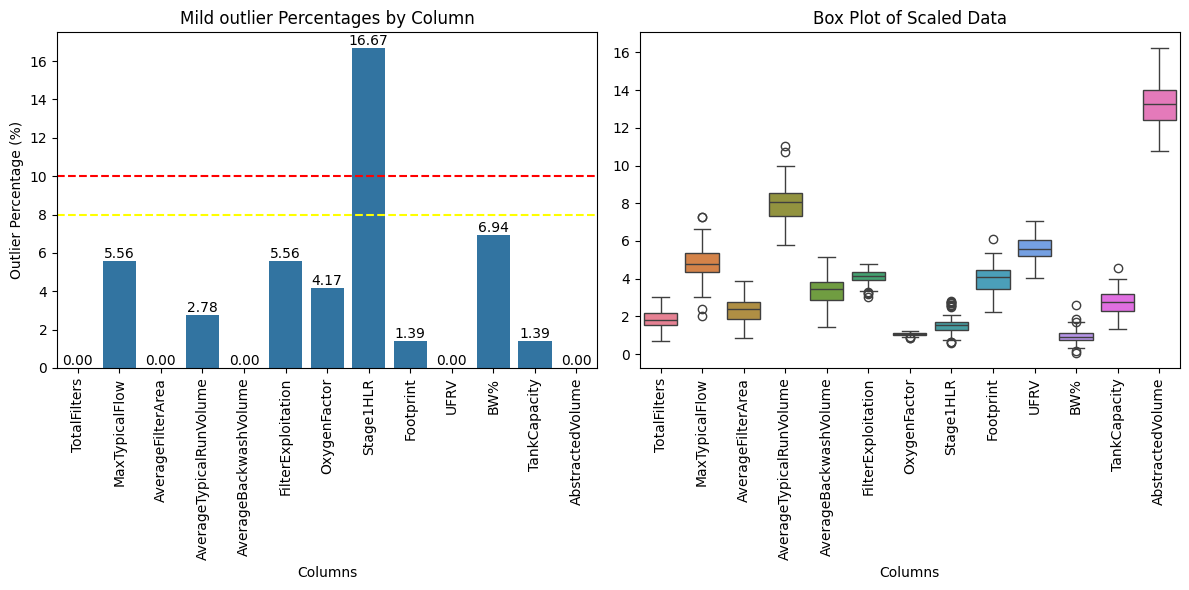

In [111]:
def remove_outliers_zscore(data, columns, threshold=3):
    z_scores = stats.zscore(data[columns])
    data_cleaned = data[(abs(z_scores) < threshold).all(axis=1)]
    return data_cleaned

data_frame_outliers = remove_outliers_zscore(data_frame_outliers, data_frame_outliers.select_dtypes(exclude='object').columns)

outlier_stat(data_frame_outliers)

array([[<Axes: title={'center': 'TotalFilters'}>,
        <Axes: title={'center': 'MaxTypicalFlow'}>,
        <Axes: title={'center': 'AverageFilterArea'}>,
        <Axes: title={'center': 'AverageTypicalRunVolume'}>],
       [<Axes: title={'center': 'AverageBackwashVolume'}>,
        <Axes: title={'center': 'FilterExploitation'}>,
        <Axes: title={'center': 'OxygenFactor'}>,
        <Axes: title={'center': 'Stage1HLR'}>],
       [<Axes: title={'center': 'Footprint'}>,
        <Axes: title={'center': 'UFRV'}>,
        <Axes: title={'center': 'BW%'}>,
        <Axes: title={'center': 'TankCapacity'}>],
       [<Axes: title={'center': 'AbstractedVolume'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

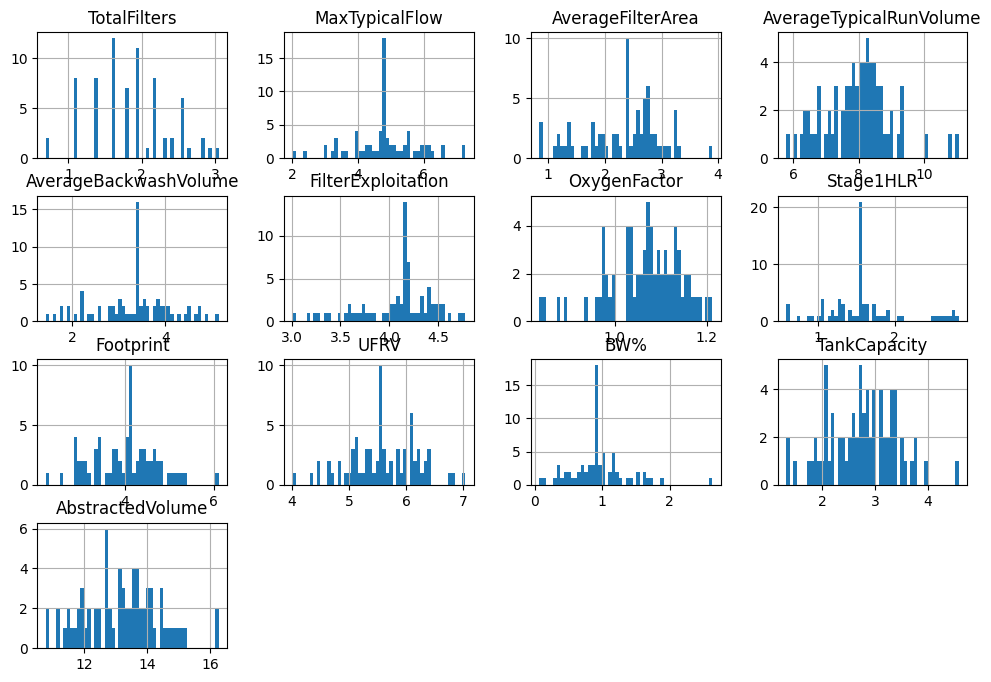

In [112]:
data_frame_outliers.hist(bins=50, figsize=(12,8))

C:\Users\Test\AppData\Local\Temp\ipykernel_6996\326797164.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(outliers_pd['col_name'], rotation=90)
C:\Users\Test\AppData\Local\Temp\ipykernel_6996\326797164.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(df_outliers.loc[:, ~df_outliers.columns.str.contains('_')].columns, rotation=90)


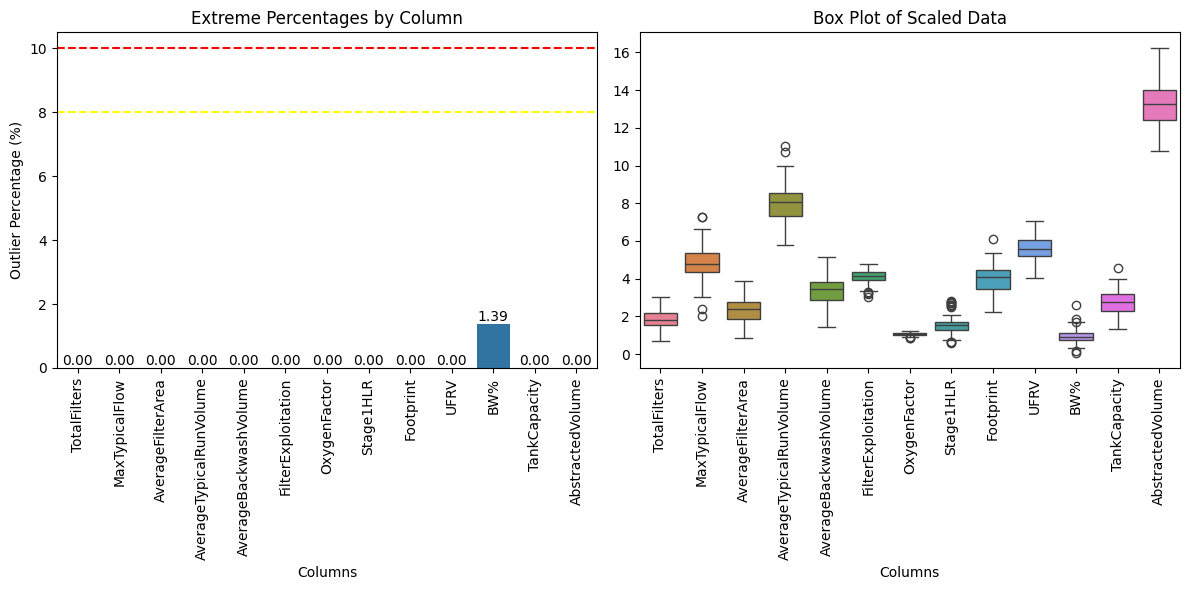

In [113]:
ext_outlier_stat(data_frame_outliers)

We lack the domain knowledge to objectively decide whether outliers can be removed, hence they will be kept.

### 4. Scaling

In [114]:
from sklearn.preprocessing import MinMaxScaler

#Scaling and imputation - default strategy for NaN's - median, there will be no difference in number of colsXrows
#in between dataframes since instead of dropping more data, NaN's are replaced with median value of the column
scaler = MinMaxScaler()
data_frame_scaled = pd.DataFrame(scaler.fit_transform(data_frame_imputed), columns=data_frame_imputed.columns)

print(data_frame_scaled.shape)
data_frame_scaled

(79, 13)


,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,TankCapacity,AbstractedVolume
0,0.263158,0.030645,0.100245,0.078884,0.054519,0.416917,0.610390,0.038377,0.306610,0.758179,0.009651,0.263365,0.021561
1,0.157895,0.072913,0.076834,0.000797,0.161185,0.472130,0.399351,0.686409,0.018993,0.000000,0.649245,0.000000,0.052881
2,0.157895,0.079958,0.300703,0.056574,0.488889,0.485718,0.880952,0.206473,0.082545,0.191375,0.059990,0.205094,0.059015
3,0.052632,0.079958,0.314779,0.015139,0.149333,0.469758,0.767316,0.193763,0.423011,0.031447,0.059277,0.106313,0.013128
4,0.052632,0.079958,0.003597,0.000000,0.021926,0.469758,0.150433,0.193763,0.917517,0.116106,0.049401,0.528936,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.789474,1.000000,1.000000,0.047809,0.647111,0.748210,0.339827,0.292804,0.035784,0.200021,0.002966,0.070329,1.000000
75,1.000000,0.986819,0.189893,0.067729,0.333037,0.725743,0.816017,0.403073,0.031114,0.368434,0.032938,0.036911,0.962179
76,0.263158,0.171539,0.288016,0.033171,0.300859,0.039153,0.442641,0.133149,0.455919,0.107676,0.123820,0.210868,0.036395
77,0.578947,0.079958,0.774684,0.066135,0.789333,0.469758,0.870130,0.193763,0.327445,0.048419,1.000000,0.133411,0.132353


### 5. Encoding non-numerical values

In [115]:
nn_cols = data_frame_point2.select_dtypes(exclude=['number'])
display(nn_cols.nunique())
nn_values_unique = [data_frame_point2[column].unique() for column in nn_cols.columns]
display(nn_values_unique)

PrimaryTrigger          4
AerationType            8
GravityPressureMixed    3
Stages                  4
dtype: int64

[array(['Time', 'Volume', 'Waterlevel above filter', 'Mix'], dtype=object),
 array(['Cascade', 'Air injection', 'Bottom aeration',
        'Pure oxygen injection', 'Passive plate aerator',
        'No primary aeration', 'Other', 'Inka'], dtype=object),
 array(['Gravity', 'Pressure', 'Mixed'], dtype=object),
 array(['Single', 'Double', 'Mixed', 'Triple'], dtype=object)]

In [116]:
data_frame_point2 = pd.get_dummies(data_frame_point2, columns=['PrimaryTrigger', 'AerationType', 'GravityPressureMixed'])

stages_mapping = {
    'Single': 1,
    'Double': 2,
    'Triple': 3,
    'Mixed': 4
}

data_frame_point2['Stages'] = data_frame_point2['Stages'].map(stages_mapping)

display(data_frame_point2)

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,...,AerationType_Bottom aeration,AerationType_Cascade,AerationType_Inka,AerationType_No primary aeration,AerationType_Other,AerationType_Passive plate aerator,AerationType_Pure oxygen injection,GravityPressureMixed_Gravity,GravityPressureMixed_Mixed,GravityPressureMixed_Pressure
0,6,50.00,6.000000,5200.00000,10.00,57.886530,1.880000,1.388889,143.341204,866.666667,...,False,True,False,False,False,False,False,True,False,False
1,4,110.00,4.908739,300.00000,28.00,63.521586,1.620000,11.204508,16.714412,40.743665,...,False,False,False,False,False,False,False,False,False,True
2,4,120.00,15.343900,3800.00000,83.30,64.908486,2.213333,3.935020,44.693822,249.217919,...,True,False,False,False,False,False,False,True,False,False
3,2,NaN,16.000000,1200.00000,26.00,NaN,2.073333,NaN,194.588021,75.000000,...,False,True,False,False,False,False,False,True,False,False
4,2,NaN,1.495000,250.00000,4.50,NaN,1.313333,NaN,412.300024,167.224093,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,1426.00,47.940002,NaN,110.00,91.698648,1.546667,5.242647,24.106636,NaN,...,False,True,False,False,False,False,False,True,False,False
75,20,1407.29,10.178760,4500.00000,57.00,89.405620,2.133333,6.912876,22.050800,442.097088,...,False,False,False,False,False,True,False,False,False,True
76,6,250.00,14.752500,2331.50137,51.57,19.331598,1.673333,2.824380,209.076387,158.041107,...,True,False,False,False,False,False,False,True,False,False
77,12,NaN,37.437401,4400.00000,134.00,NaN,2.200000,NaN,152.513970,93.489396,...,False,True,False,False,False,False,False,True,False,False


### 6. Correlation matrix

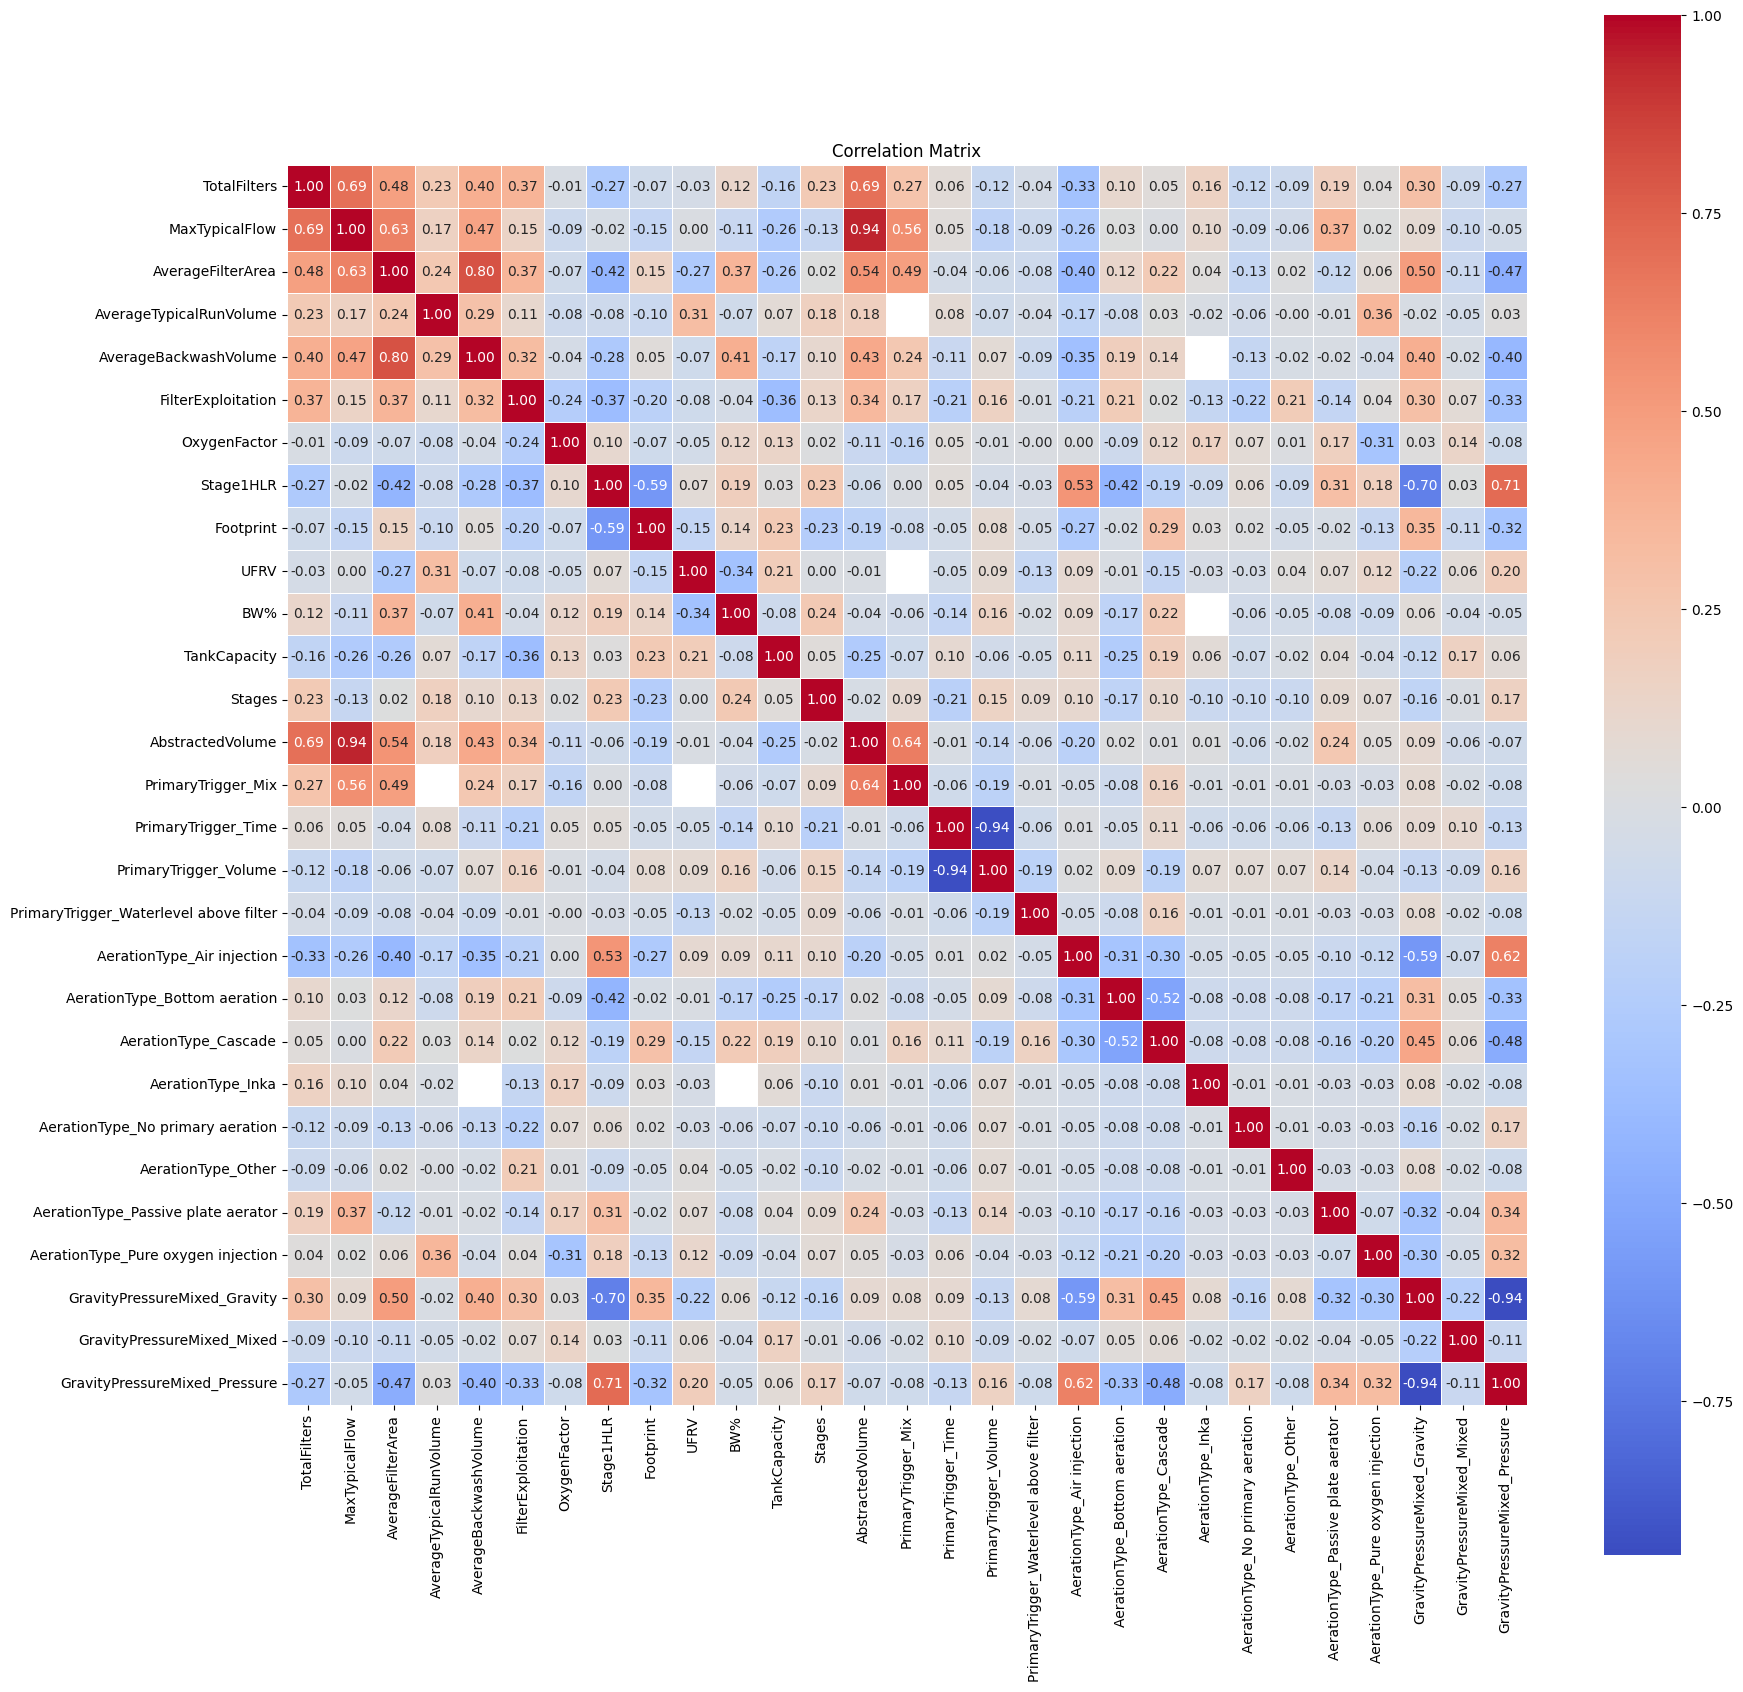

In [117]:
correlation_matrix = data_frame_point2.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Analysis of Correlation Matrix:
- The highest positive correlation is <b>0.94</b> (MaxTypicalFlow - AbstractedVolume) which means that if one variable increases the other one will also significantly increase
- Additionally there are few negative correlations of <b>-0.94</b> (PrimaryTrigger_Volume - PrimaryTriggerTime, GravityPressuredMixed_Gravity - GravityPressuredMixed_Pressure) which means that if one variable decreases the other one will also decrease significantly.<br>
- There is number of correlations that are around +0.84 and -0.70

In [118]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

data = data_frame_point2

numeric_data = data.select_dtypes(include=np.number)

for col in numeric_data.columns:
    #skewness = skew(numeric_data[col])
    skewness = skew(data[col].dropna())
    print(f'Skewness of {col}: {skewness}')

    if skewness > 1:
        numeric_data[col] = np.log1p(numeric_data[col])
    elif skewness < -1:
        numeric_data[col] = np.square(numeric_data[col])

Skewness of TotalFilters: 1.2417448686674144
Skewness of MaxTypicalFlow: 2.845816499427495
Skewness of AverageFilterArea: 1.4852095579936442
Skewness of AverageTypicalRunVolume: 4.980029900284562
Skewness of AverageBackwashVolume: 1.5313294757193154
Skewness of FilterExploitation: 0.056851651725732213
Skewness of OxygenFactor: -0.7490652453023416
Skewness of Stage1HLR: 1.2547343892081824
Skewness of Footprint: 2.9991273926965234
Skewness of UFRV: 1.453832421832119
Skewness of BW%: 4.324128791084993
Skewness of TankCapacity: 2.60719322697127
Skewness of Stages: 0.9767358626366025
Skewness of AbstractedVolume: 4.311795955043283


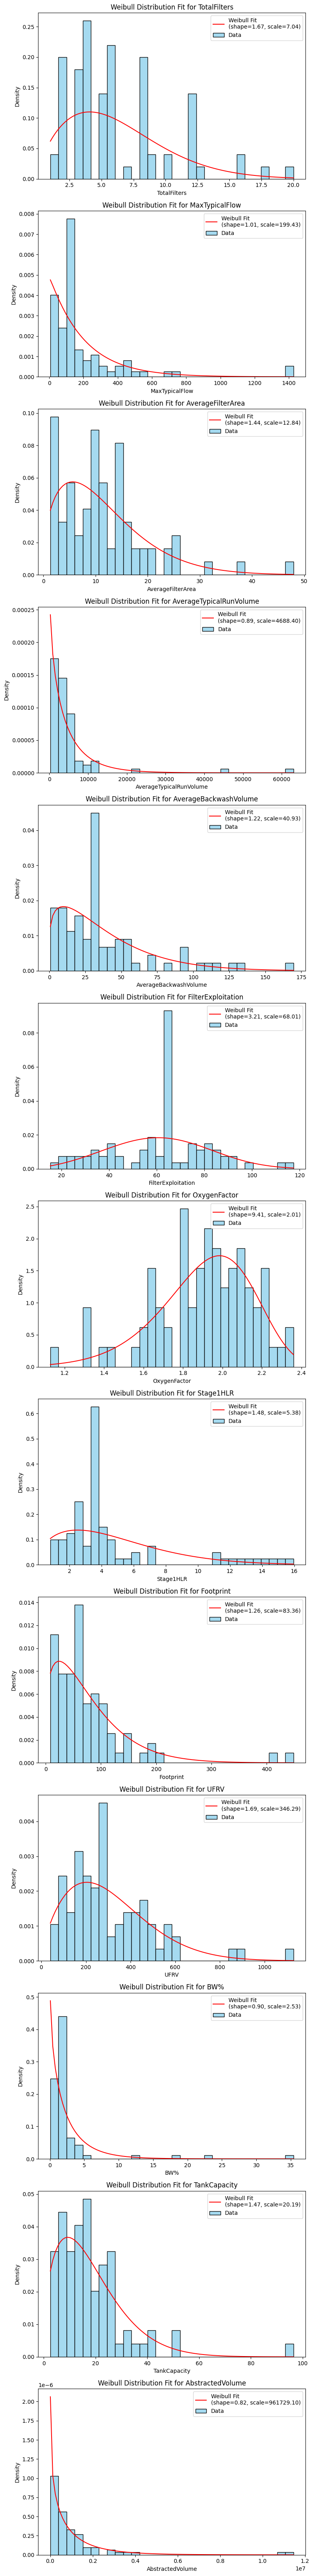

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
import seaborn as sns

def plot_weibull_distributions(df):
    
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    num_columns = len(numeric_columns)
    fig, axes = plt.subplots(num_columns, 1, figsize=(8, 5 * num_columns))

    if num_columns == 1:
        axes = [axes]
    
    for ax, column in zip(axes, numeric_columns):
        data = df[column].dropna()

        shape, loc, scale = weibull_min.fit(data, floc=0) 
        
        x = np.linspace(data.min(), data.max(), 100)
        weibull_pdf = weibull_min.pdf(x, shape, loc, scale)

        sns.histplot(data, bins=30, kde=False, stat="density", color="skyblue", label='Data', ax=ax)
        
        ax.plot(x, weibull_pdf, 'r-', label=f'Weibull Fit\n(shape={shape:.2f}, scale={scale:.2f})')
        ax.set_title(f'Weibull Distribution Fit for {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Density')
        ax.legend()

    plt.tight_layout()
    plt.show()

plot_weibull_distributions(data_frame_imputed)

#### Weibull Distribution
Weibull distribution is a continouus probability distribution. Using it we can evaluate data that exhibit skewness, which can have 'normal' shape or be even exponential.
Each histogram shows the actual data for a given variable alongside with the overlaid Weibull curve representing the actual distribution.
The curve's allignment indicates how well the distribution fits with our data:
- If the curve follows the of shape of the histogram it suggest that the Weibull distribution is a good model for that variable
- If the curve deviates from the histogram - the variable is not following a Weibull distribution closely.
Additionally, a close Weibull fit can indicate the type of skewness (left or right).

#### Analyzing Skewness baised on Weibull distribution
We will take 'Stage1HLR' as our example to explain few things:<br>
There are 2 most important parameters in Weibull distribution: Shape parameter (k) and Scale parameter (λ).<br>
For 'Stage1HLR' those values are k=1.48 and λ=5.38.<br>
According to math and theory on Weibull distribution we can make following conclusions:<br>
- When k > 1, the distribution is left-skewed or has a longer tail on the left (since the it is left tail it means more 'low' values)<br>
- λ indicates a streatching factor a.k.a. spread of the data. High λ, indicates a broad distribution with data values being spread<br>
- λ=5.38 is fairly moderate range<br>

#### Possible data tranformations (Log, square root) in 3 differenct cases (Right/Left Skewed data, symmetric data)
<b>Right-Skewed Data (Positive Skewness)</b><br>
k < 1 : suggest distribution with a right tail, meaning many high values in the data<br>
Log tranformation should be used in that case - it will compress larger values that should make the data more symmetric<br>
Square root tranformation: could also be used in case if there are many values close to zero (which would make log transform less efficient)<br>

<b>Left-Skewed Data (Negative Skewness)</b><br>
k > 1 : suggest distribution with a left tail, meaning more 'low' values (lower-end)<br>
Both log and square root can be applied in that case, however additional step of reflecting the values (flipping data so it goes in opposite direction) might be good idea before applying log or square root transformation.<br>

<b>Nearly Symmetrical Data (Little Skewness)</b><br>
Generally, no transformation should be required.

### 7. Discussion

#### Amount of data in dataset
80 rows is a small dataset, rendering it difficult to reliably train a model with a train, validation and test sets.
Ideally, the simplest and most reliable solution would be *getting* more data.
However, in other case, **Cross-Validation** could be applied to *get the most* out of the dataset and try training and validating on different portions of the dataset.

#### Final thoughts on the dataset
Lack of domain knowledge and what is the target value in this set makes it difficult to claim that the dataset is clean. Gaining knowledge in this sections would affect in the future:
-   **Assessment on NaNs** - deleting features and rows requires domain knowledge to be able to objectively decide which can be deleted, and which have to be imputed. Similarily, getting to know the target variable would allow to delete rows, where it would be null/NaN.
-   **Removing/keeping/replacing outliers** - again, without the domain knowledge, it is difficult to assess whether outliers are the way they are intended to be, or whether they are rather an error and should be handled.

#### Overview of steps that has been taken in data preprocessing
1. Filtering irrelevant columns led to removing 9 columns. This resulted in reducing 'noise' and maximizing relevant information content of the dataset.
2. Removing rows with excessive amount of NaNs was necessary since they don't contribute any information to the dataset, which could lead to inaccuracies (if we were to use the data in machine learning model)
3. Imputing Missing Values down to avoid dropping more rows, that would further reduce already small dataset.
   The choice of imputation method - 'median' is a safe choice. It minimizes potential introduction of artificial patterns and introduces stable estimates of missing values based on median value from the same column.
4. Dealing with outliers: Removing or modifying outliers could prevent the outliers from influencing the analysis. However, due to lack of domain knowledge they will be kept intact.
5. Scaling numeric data: we have chosen MinMaxScaler to scale numeric data. It is a way to normalize the input features/variables in a way that data will be transformed into the range [0,1]
   The way it scales data can be described using following formula:<br>
   <b>X' = X - Xmin/Xmax - Xmin</b>
6. Encoding Non-numerical values:<br>
   After identifying non-numerical columns using get_dummies() one-hot encoding was applied, creating binary columns for each category in these columns.<br>
   As a result (for example) in Stages columns: Single is represented as 1, Double - 2, Triple - 3 and Mixed - 4.<br>
7. Correllation matrix has been created allowing for analyzing correlation between variables.
8. We have analyzed data skewness using two approaches:
   - from scipy.stats library we have numerical values of skewness on each variable (however one might argue on practicality of this approach)
   - using Weibull distribution we have all the data (shape of the curve, k and λ) to investigate type of skewness (left-negative, right-positive, symmetrical) which allows us to act accordingly with tranformation of the data (log, square root)
9. Data transformation - we have drawn general conlusions and approach based on type of skewness (with one additional example explaining Weibull distribution) but the tranformation itself will not be performed.
10. With that being said we declare that our data is clean.

#### Consequences of Small Dataset Size in Machine Learning models
As we have already established, the dataset is relatively small. Therefore it can lead to following problems.
1. Small datasets can lead to high-variance, which may perform well on the training data but poorly on new, unseen data.
2. With small amounts of data, there is risk of overfitting.
3. If we were to use 'simple' linear regressions models (ex. linear regression, decision trees, KNN) the models might perform okay, however more complicated models will require more amounts of data. 